In [14]:
# IR0: Veri Okuma ve İşleme

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Veriyi oku
file_path = "music_genre.csv"
df = pd.read_csv(file_path)

# Rastgele sırala
df = shuffle(df)

# '?' karakterini içeren değerleri NaN ile değiştir
df.replace('?', pd.NA, inplace=True)

# '?' karakterini içeren satırları kaldır
df = df.dropna()


# Metin sütunlarındaki kategorik değerleri sayısal değerlere dönüştür
label_encoder = LabelEncoder()
df['music_genre'] = label_encoder.fit_transform(df['music_genre'])
df['artist_name'] = label_encoder.fit_transform(df['artist_name'])
df['track_name'] = label_encoder.fit_transform(df['track_name'])
df['mode'] = label_encoder.fit_transform(df['mode'])
df['key'] = label_encoder.fit_transform(df['key'])
df['obtained_date'] = label_encoder.fit_transform(df['obtained_date'])

<ipython-input-14-fa825ae44afd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['music_genre'] = label_encoder.fit_transform(df['music_genre'])
<ipython-input-14-fa825ae44afd>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['artist_name'] = label_encoder.fit_transform(df['artist_name'])


In [15]:
# IR1: Model Seçimi ve Eğitimi

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Veriyi eğitim ve test setlerine ayır
X = df.drop('music_genre', axis=1)  # 'target_column' yerine uygun sütun adını kullan
y = df['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelleri oluştur
svm_model = SVC()
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
ann_model = MLPClassifier()

# Modelleri eğit
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLPClassifier()

In [16]:
# IR2: Model Performansını Kontrol Etme

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return acc, conf_matrix

# Modellerin performansını değerlendir
svm_acc, svm_conf_matrix = evaluate_model(svm_model, X_test, y_test)
lr_acc, lr_conf_matrix = evaluate_model(lr_model, X_test, y_test)
knn_acc, knn_conf_matrix = evaluate_model(knn_model, X_test, y_test)
dt_acc, dt_conf_matrix = evaluate_model(dt_model, X_test, y_test)
ann_acc, ann_conf_matrix = evaluate_model(ann_model, X_test, y_test)

# Sonuçları yazdır
print("SVM Accuracy:", svm_acc)
print("LR Accuracy:", lr_acc)
print("KNN Accuracy:", knn_acc)
print("DT Accuracy:", dt_acc)
print("ANN Accuracy:", ann_acc)

SVM Accuracy: 0.16681474900044424
LR Accuracy: 0.14027099067081297
KNN Accuracy: 0.14782318969346958
DT Accuracy: 0.46212794313638383
ANN Accuracy: 0.16159484673478455


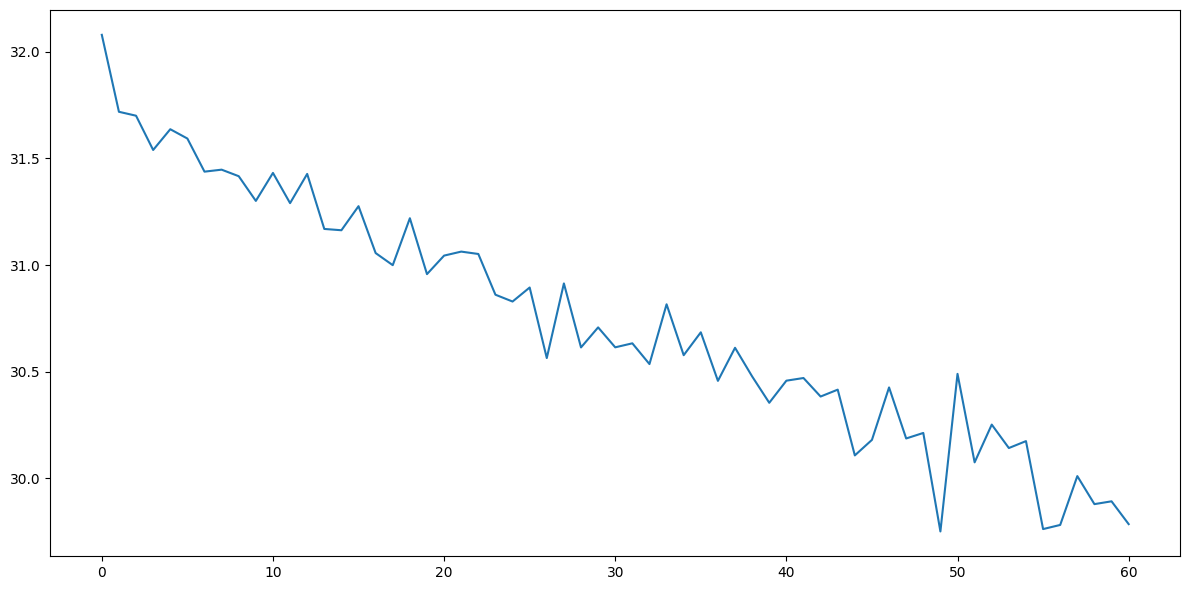

In [22]:
# IR3: Eğitim ve Test Kayıpları ile Doğruluk Metriklerini Çizme

# Model eğitim geçmişini al (sadece ANN için)
ann_train_loss = ann_model.loss_curve_

# Eğitim kayıplarını çiz
plt.figure(figsize=(12, 6))
plt.plot(ann_train_loss, label='ANN Training Loss')

# IR4: Test kayıplarını ve doğruluk metriklerini çiz
def plot_metrics(train_loss, test_loss, acc, model_name):
    plt.figure(figsize=(12, 6))

    # Eğitim kayıplarını çiz
    if train_loss is not None:
        plt.plot(train_loss, label=f'{model_name} Training Loss')

    # Test kayıplarını çiz
    if test_loss is not None:
        plt.plot(test_loss, label=f'{model_name} Test Loss', color='orange')

    # Doğruluk metriklerini yazdır
    plt.title(f'Loss Over Iterations and Accuracy ({model_name})')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()


# Tüm grafikleri göster
plt.tight_layout()
plt.show()
